## Q. What is outliers?

### Most affected algorithm from outliers:

In [ ]:
>> Linear Regression
>> Logistic Regression
>> Adaboost
>> Deep Learning

Common pattern is >> calculation of weights

## Q. How to treat Outliers?

## Q. How to detect the Outliers?


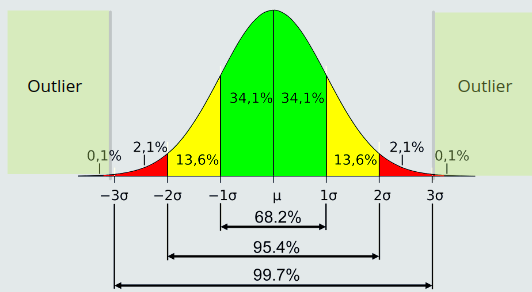

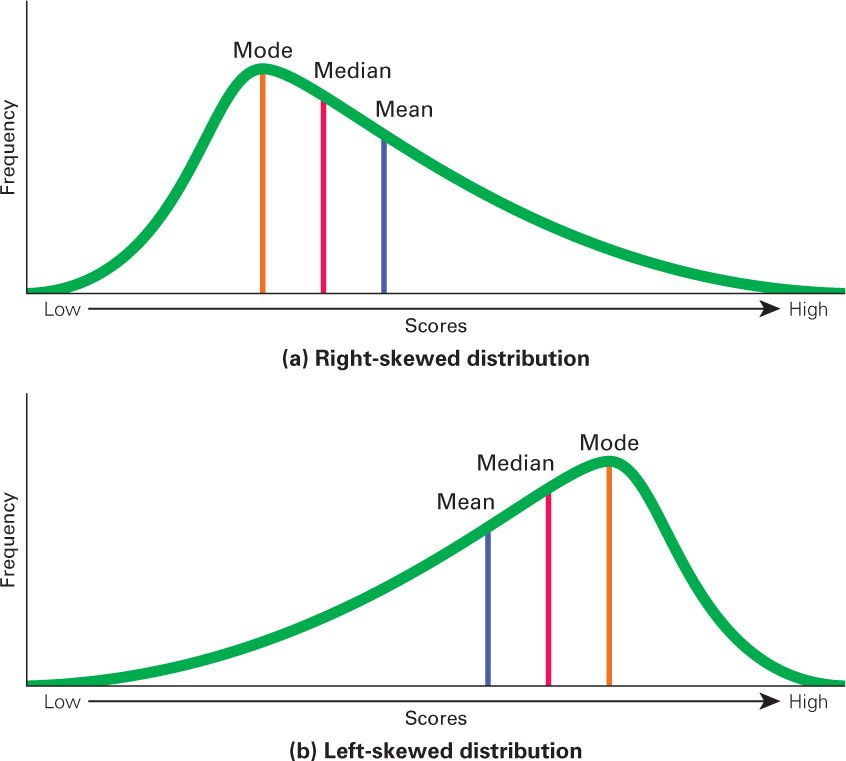

outliers detection using IQR for skewed distribution

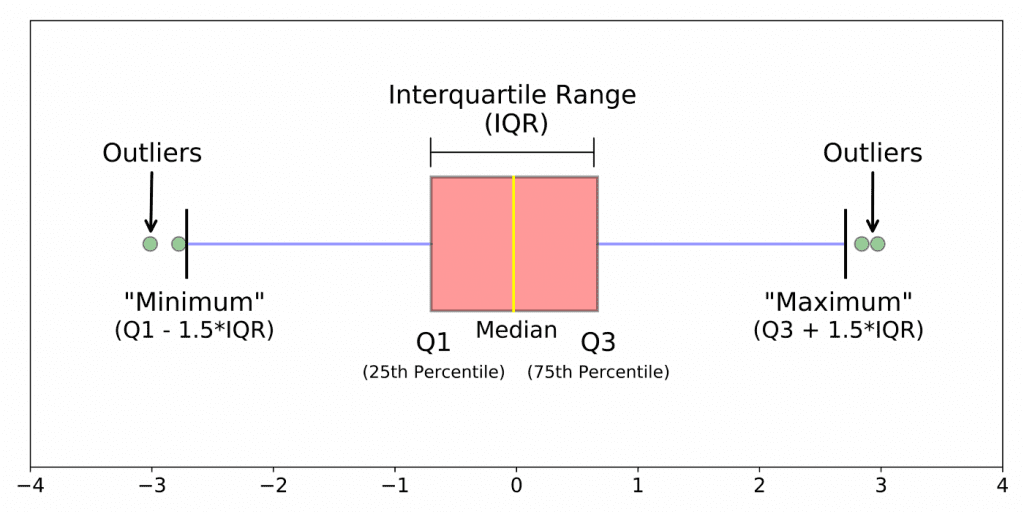

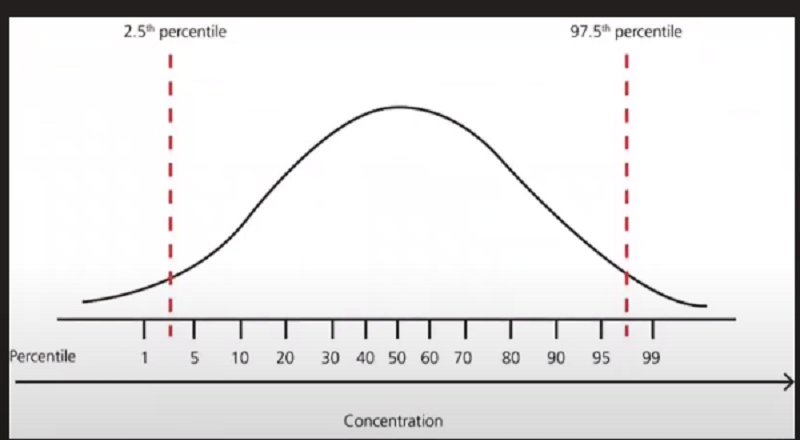

## Techniques for outliers detection and removal

### 1. Outliers removal using Z-score

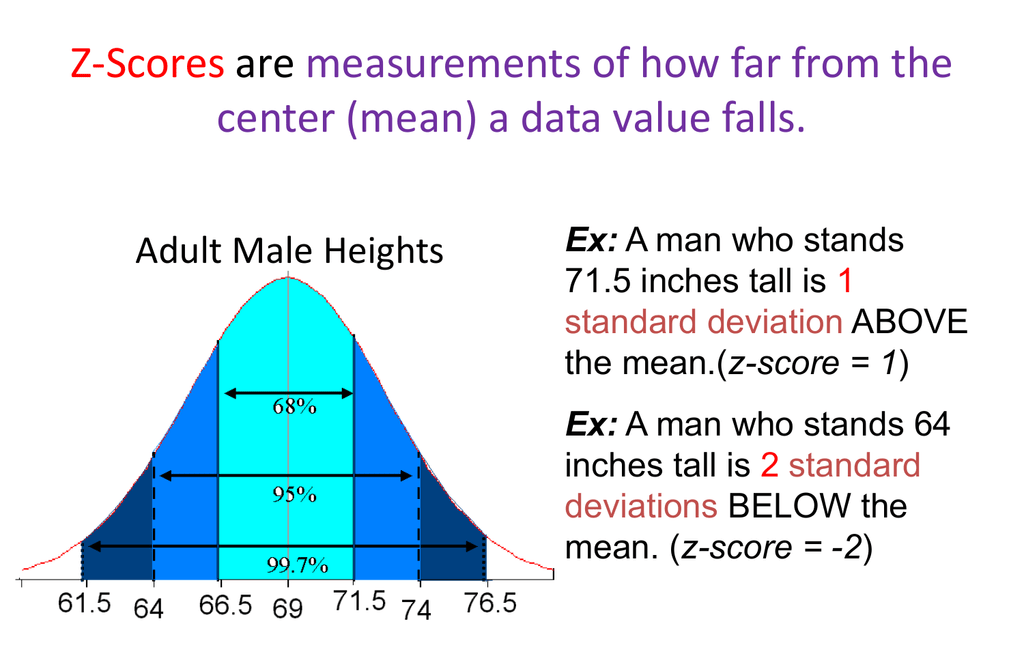

## Treatment:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [7]:
df = pd.read_csv('placement.csv')
df.sample(5)

,cgpa,placement_exam_marks,placed
810,7.14,21.0,1
939,6.98,41.0,0
525,6.33,17.0,0
377,6.70,47.0,1
138,7.53,8.0,1


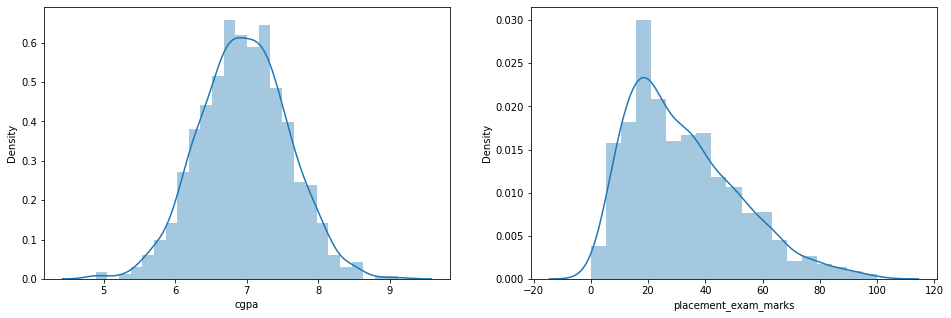

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [15]:
print('mean value of cgpa',df['cgpa'].mean())
print('std value of cgpa',df['cgpa'].std())
print('min value of cgpa',df['cgpa'].min())
print('max value of cgpa',df['cgpa'].max())

mean value of cgpa 6.96124
std value of cgpa 0.6158978751323896
min value of cgpa 4.89
max value of cgpa 9.12


In [16]:
# finding the boundary values

print('highest allowed',df['cgpa'].mean() + 3*df['cgpa'].std())

print('lowest allowed',df['cgpa'].mean() - 3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [17]:
# finding the outliers

df[(df['cgpa'] > 8.8) |(df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [21]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [23]:
df.shape,new_df.shape

((1000, 3), (995, 3))

## OR

In [24]:
## calculating the z-score

df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()


In [25]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [26]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [27]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [30]:
new_df = df[(df['cgpa_zscore'] < 3 ) & (df['cgpa_zscore'] > -3) ]
new_df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [31]:
new_df.shape

(995, 4)

## capping

In [32]:
upper_limit = df['cgpa'].mean() + 3* df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3* df['cgpa'].std()

In [33]:
upper_limit,lower_limit

(8.808933625397168, 5.113546374602832)

In [35]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [38]:
df.shape

(1000, 4)

## 2. Outliers Detection using IQR  (Boxplot Method) 

USED ONLY WHEN data is RIGHT OR LEFT SKEWED DISTRIBUTE

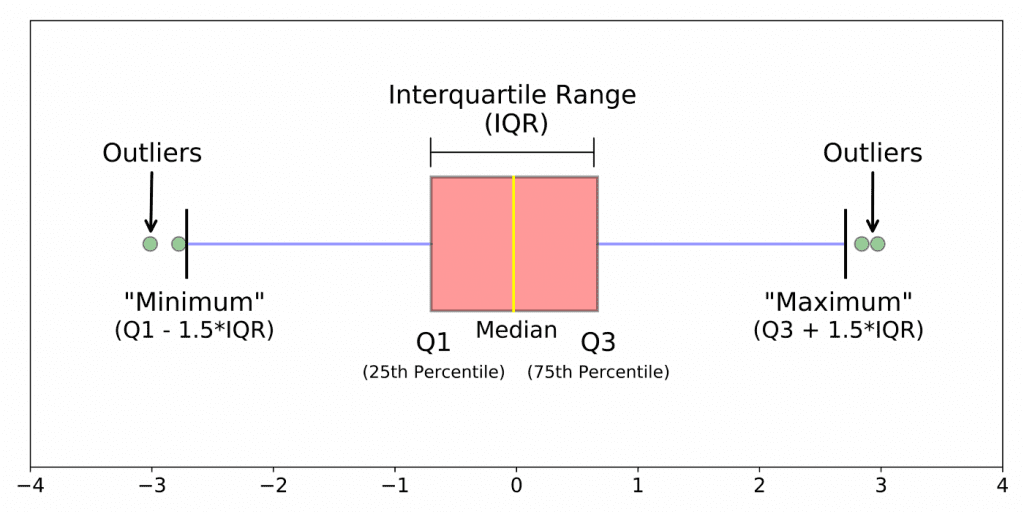

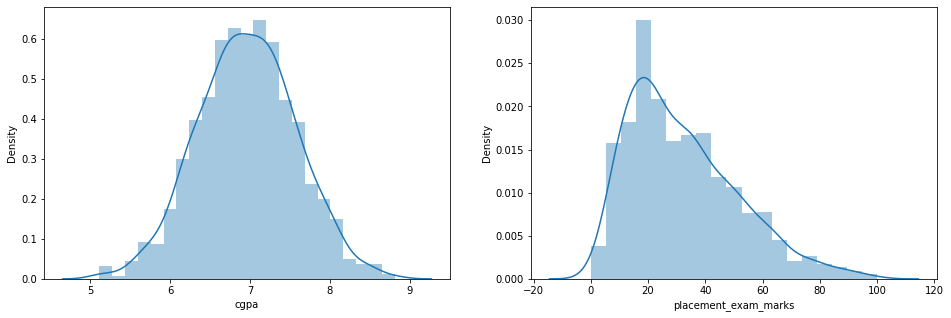

In [39]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [40]:
df['placement_exam_marks'].skew()  # right skewed distribution

0.8356419499466834

In [41]:
df['cgpa'].skew()  # nearly normally distributed 

-0.003704380991302917

In [42]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

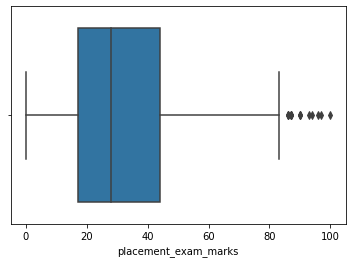

In [43]:
sns.boxplot(df['placement_exam_marks'])

In [44]:
percentile25 = df['placement_exam_marks'].quantile(.25)
percentile75 = df['placement_exam_marks'].quantile(.75)

In [45]:
percentile25,percentile75

(17.0, 44.0)

In [46]:
IQR = percentile75-percentile25
IQR

27.0

In [48]:
upper_limit = percentile75 + 1.5* IQR
lower_limit = percentile25 - 1.5* IQR

In [50]:
print('Upper limit >',upper_limit)
print('Lower limit >',lower_limit)

Upper limit > 84.5
Lower limit > -23.5


In [51]:
# finding outliers

In [60]:
df[df['placement_exam_marks'] > upper_limit].shape

(15, 4)

In [53]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


## Trimming

In [58]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 4)

<AxesSubplot:xlabel='placement_exam_marks'>

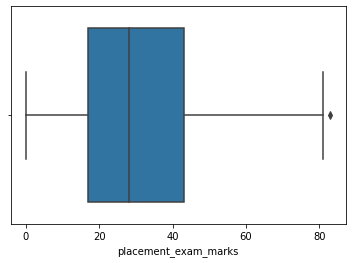

In [62]:
sns.boxplot(new_df['placement_exam_marks'])

## capping

In [63]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks']= np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']    
    )
)


In [66]:
new_df_cap.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [65]:
new_df_cap.shape

(1000, 4)

<AxesSubplot:xlabel='placement_exam_marks'>

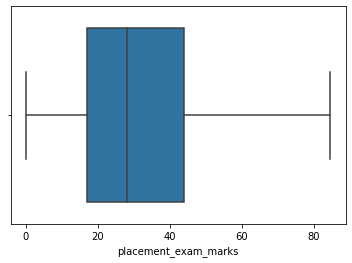

In [67]:
sns.boxplot(new_df_cap['placement_exam_marks'])

## 3. percentile method

ex :
     Marks in exam (rank -1) GOT marks 95
    so, 100% student score less than rank-1 student
     lowest score in the exam is 10 marks
    so, 0% student score less than 10 marks

In [15]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [16]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [17]:
df.shape

(10000, 3)

In [18]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='Height', ylabel='Density'>

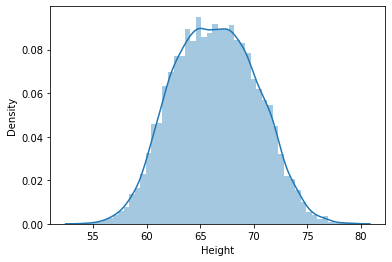

In [20]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height'>

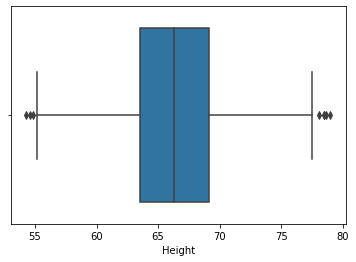

In [21]:
sns.boxplot(df['Height'])

In [23]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [24]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [29]:
df[(df['Height']>=74.78) | (df['Height']<= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [33]:
new_df = df[(df['Height']<=74.78) &  (df['Height']>= 58.13)]
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [36]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

In [35]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

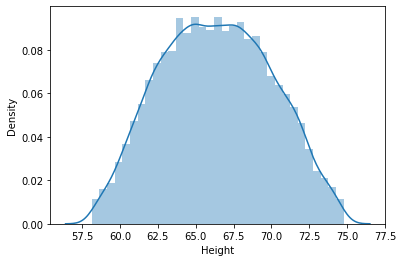

In [38]:
sns.distplot(new_df['Height'])

<AxesSubplot:xlabel='Height'>

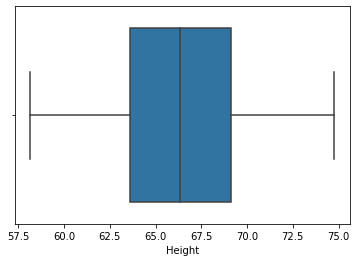

In [39]:
sns.boxplot(new_df['Height'])

In [44]:
## capping --> winsorization

df['Height'] = np.where(df['Height'] >= upper_limit,
         upper_limit,
         np.where(df['Height'] <= lower_limit,
         lower_limit,
         df['Height'])
        )

In [45]:
df.shape

(10000, 3)

In [47]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

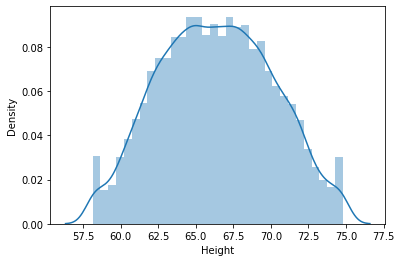

In [48]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height'>

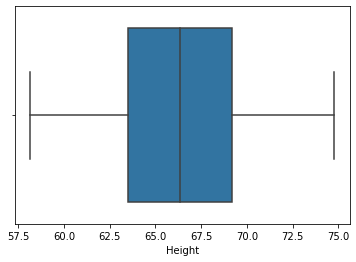

In [49]:
sns.boxplot(df['Height'])